# Research of ads for the sale of apartments

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Open the data file and examine the general information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


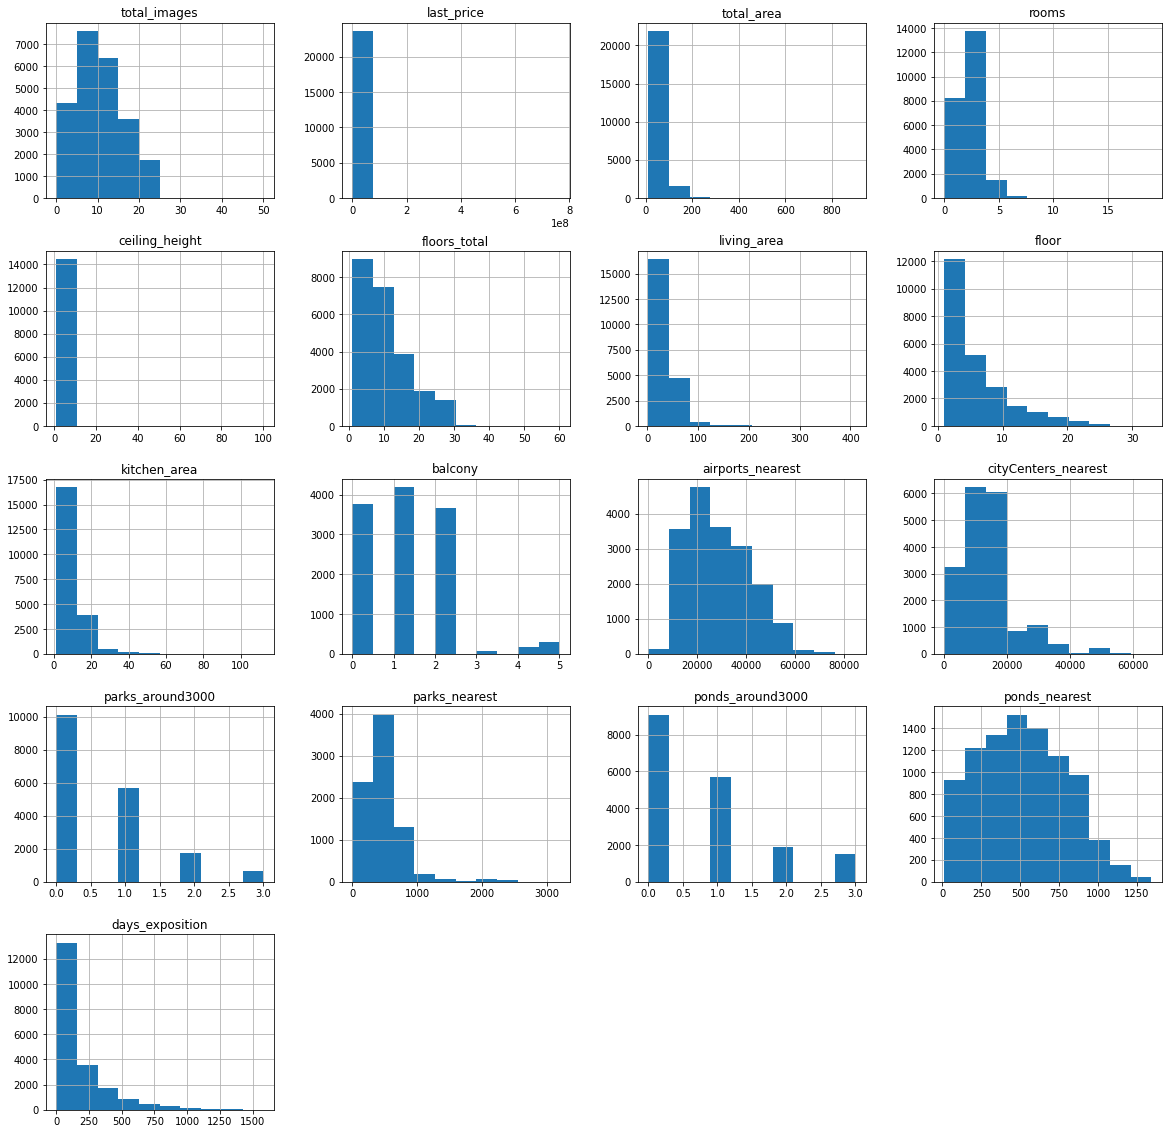

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(10))
data.hist(figsize=(20,20))
plt.show()

**Conclusion**

You can notice incorrect data types and gaps, let's look at it below

### Data preprocessing

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.isnull().sum().sort_values()
#посмотрим в каких стобцах пропуски и нужно ли их заполнять

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [4]:
len(data['locality_name'].unique()) # how many unique values are in the city column

365

In [5]:
#replace all 'е' with 'ё' and see how many unique values are left
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True) 
len(data['locality_name'].unique())

331

In [6]:
duplicates = ['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции', 'поселок станции']
name = 'поселок'
def replace_wrong_values(duplicates, name):
    for wrong_value in duplicates:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, name)
replace_wrong_values(duplicates, name)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [7]:
duplicates = ['садоводческое некоммерческое товарищество']
name = 'садовое товарищество'
def replace_wrong_values(duplicates, name):
    for wrong_value in duplicates:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, name)
replace_wrong_values(duplicates, name)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [8]:
data['locality_name'].isna().sum() # how many gaps are in a column

49

In [9]:
data = data.dropna(subset=['locality_name']) # remove all gaps from the column, we don't need them
data.reset_index(drop=True, inplace=True)
data['locality_name'].isna().sum()

0

In [10]:
# consider the height of the ceilings
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
#data = data.loc[(data['ceiling_height'] >= 1.75) & (data['ceiling_height'] <= 3.5)]
data.loc[data['ceiling_height']>=20, 'ceiling_height']=data['ceiling_height']/10
# got rid of anomalous ceiling heights above 20, most likely they made a mistake in these values, divided by 10
data['ceiling_height'].describe()

count    14490.000000
mean         2.729355
std          0.319691
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

In [12]:
# deal with apartments
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [13]:
# replace all NaNs with False
data['is_apartment'] = data['is_apartment'].fillna(False)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
data['is_apartment'] = data['is_apartment'].astype(bool) # change the type of the column to boolean so that all values of 0 change to False
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
data.head() # all 0 values changed to False

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [17]:
# look at the balconies
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [18]:
# all NaNs will be replaced by 0, because most people who do not have a balcony skip this point
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [19]:
data['balcony'].value_counts().sort_values() # sorted out with balconies

3.0       81
4.0      182
5.0      304
2.0     3658
1.0     4187
0.0    15238
Name: balcony, dtype: int64

In [20]:
# day of publication of announcements
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [21]:
# convert all columns to kilometers
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['airports_nearest'] = data['airports_nearest'] / 1000
data['parks_nearest'] = data['parks_nearest'] / 1000
data['ponds_nearest'] = data['ponds_nearest'] / 1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18.863,16.028,1.0,0.482,2.0,0.755,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12.817,18.603,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21.741,13.933,1.0,0.090,2.0,0.574,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28.098,6.800,2.0,0.084,3.0,0.234,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31.856,8.098,2.0,0.112,1.0,0.048,121.0


<AxesSubplot:>

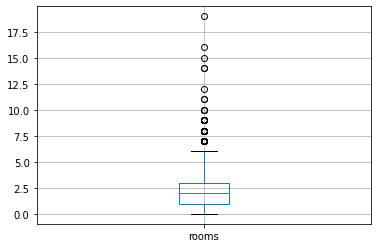

In [22]:
data.boxplot(column='rooms')

count    23455.000000
mean         2.029631
std          0.973653
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

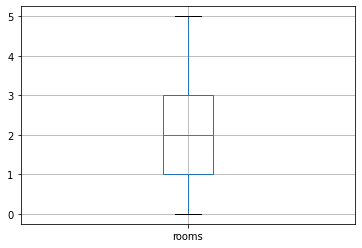

In [23]:
Q1 = data['rooms'].quantile(0.25)
Q3 = data['rooms'].quantile(0.75)
IQR = Q3-Q1
data = data[data['rooms'] < (Q3+1.5*IQR)]
data.boxplot(column='rooms')
data['rooms'].describe()

In [24]:
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total               84
living_area              1885
kitchen_area             2250
days_exposition          3122
parks_around3000         5505
ponds_around3000         5505
cityCenters_nearest      5506
airports_nearest         5528
ceiling_height           9104
ponds_nearest           14498
parks_nearest           15523
dtype: int64

**Conclusion**

We looked at the tasks that we will need to solve in this analysis and did data preprocessing without excluding anything superfluous

Reasons for gaps:
* is_apartment - the reason may be that many people skipped this item because they did not know the difference between apartments and apartments
* parks_nearest, ponds_nearest - possible technical error. Since it is impossible to fill in the gaps with some value that does not spoil the analysis, we do not fill in these columns. Number of rows where data is present enough
* balcony - replace all NaNs with 0 because most people who don't have a balcony skip this step
* days_exposition - data may be missing due to the fact that it is not known when the sale ad was closed.
it is not worth filling in these gaps with some median values, we will leave this column.
* airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - It is unlikely that these values were filled in by a person, so we can assume that they were filled in automatically in some radius, and if what we needed did not fall into this radius, there was a gap in the data.
* kitchen_area, living_area - perhaps in some apartments there is no explicit division of area or they are simply optional
* floors_total - data may be optional
* locality_name - perhaps the sellers thought that it was not necessary to indicate the location if they were already listing an apartment in the St. Petersburg section
We do not fill in many gaps since they have little effect on further analysis and calculations.

### Count and add new columns to the table

In [25]:
# add columns with days, months and years of publication of ads
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18.863,16.028,1.0,0.482,2.0,0.755,NaN,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12.817,18.603,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21.741,13.933,1.0,0.090,2.0,0.574,558.0,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28.098,6.800,2.0,0.084,3.0,0.234,424.0,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31.856,8.098,2.0,0.112,1.0,0.048,121.0,Tuesday,June,2018


In [26]:
# add floor designations
def floor_definition(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_definition'] = data.apply(floor_definition, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_definition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16.028,1.0,0.482,2.0,0.755,NaN,Thursday,March,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18.603,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13.933,1.0,0.090,2.0,0.574,558.0,Thursday,August,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6.800,2.0,0.084,3.0,0.234,424.0,Friday,July,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8.098,2.0,0.112,1.0,0.048,121.0,Tuesday,June,2018,другой


In [27]:
# add price per square meter
data['price_of_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_definition,price_of_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,0.482,2.0,0.755,NaN,Thursday,March,2019,другой,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,0.090,2.0,0.574,558.0,Thursday,August,2015,другой,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,0.084,3.0,0.234,424.0,Friday,July,2015,другой,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,0.112,1.0,0.048,121.0,Tuesday,June,2018,другой,100000.000000


**Conclusion**

We made calculations and added new columns that we will need for further analysis

### Conduct exploratory data analysis

In [28]:
# check the following parameters
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_definition', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_week_exposition', 'month_exposition']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest
count,23455.000000,21570.000000,21205.000000,2.345500e+04,23455.000000,14351.000000,23455.000000,23371.000000,17949.000000,17927.000000,7932.000000
mean,58.857759,33.468259,10.466703,6.255684e+06,2.029631,2.723840,5.906971,10.715331,14.284127,28.845329,0.492239
std,30.199918,18.550057,5.682110,8.158049e+06,0.973653,0.313486,4.891380,6.602055,8.589340,12.678731,0.344071
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,1.000000,0.181000,0.000000,0.001000
25%,40.000000,18.600000,7.000000,3.400000e+06,1.000000,2.500000,2.000000,5.000000,9.426000,18.520000,0.288000
50%,52.000000,30.000000,9.000000,4.600000e+06,2.000000,2.650000,4.000000,9.000000,13.151000,26.877000,0.456000
75%,69.000000,42.000000,12.000000,6.700000e+06,3.000000,2.800000,8.000000,16.000000,16.326000,37.407000,0.614000
max,507.000000,301.500000,107.000000,4.013000e+08,5.000000,14.000000,33.000000,60.000000,65.968000,84.869000,3.190000


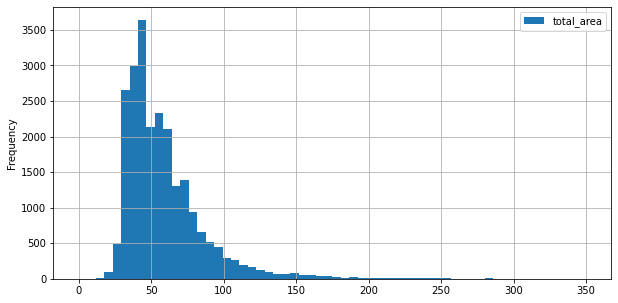

In [29]:
data.plot(y='total_area', kind='hist', bins=60, figsize=(10,5), range=(0,350), grid=True)
plt.show()

Most of the apartments have a footage from 30 to 80 sq.m., the peak falls on 50 sq.m.

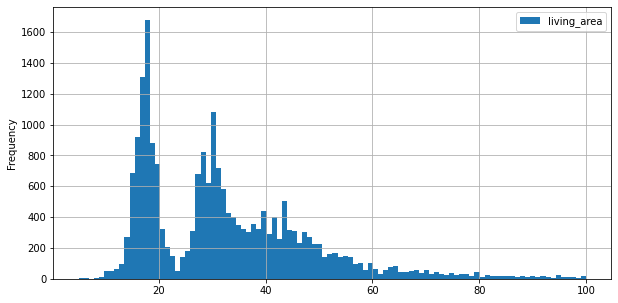

In [30]:
data.plot(y='living_area', kind='hist', bins=100, figsize=(10,5), range=(5,100), grid=True)
plt.show()

Most of the living areas are between 15 and 45 sq.m, the largest number of apartments have a living area of approximately 18 sq.m.

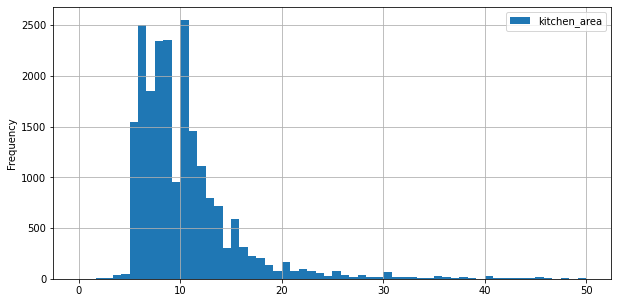

In [31]:
data.plot(y='kitchen_area', kind='hist', bins=60, figsize=(10,5), range=(0,50), grid=True)
plt.show()

The footage of the kitchen area mainly varies between 5 and 15 sq.m.

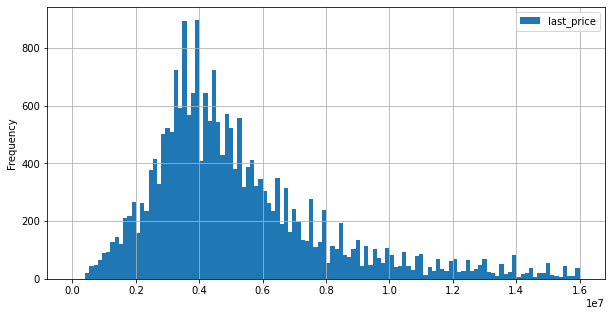

In [32]:
data.plot(y='last_price', kind='hist', bins=120, figsize=(10,5), range=(0,16000000), grid=True)
plt.show()

The price of apartments lies in the range from 3 to 11 million. Most of the apartments are sold for a price between 3 and 6 million

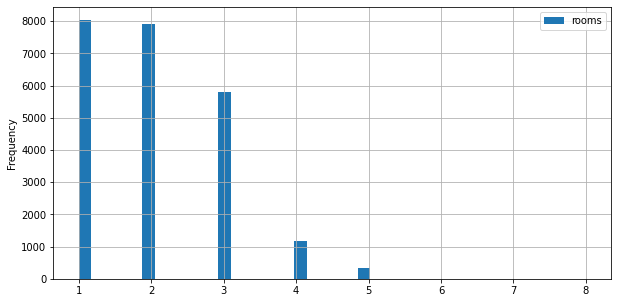

In [33]:
data.plot(y='rooms', kind='hist', bins=40, figsize=(10,5), range=(1,8), grid=True)
plt.show()

According to this histogram, we can say that most apartments have from 1 to 3 rooms, most of them are one-room and two-room apartments, between which the difference is not so great

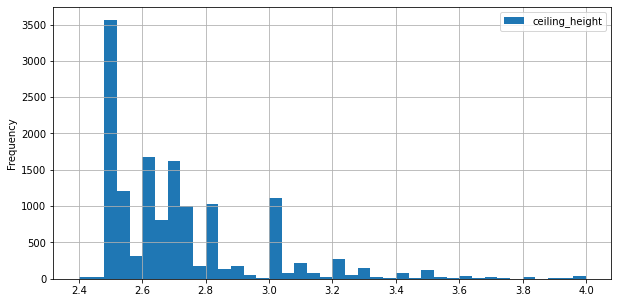

In [34]:
data.plot(y='ceiling_height', kind='hist', bins=40, figsize=(10,5), range=(2.4,4), grid=True)
plt.show()

The height of ceilings in apartments mainly varies from 2.5-2.75m to 3.2m. The rest of the cases are exclusive.

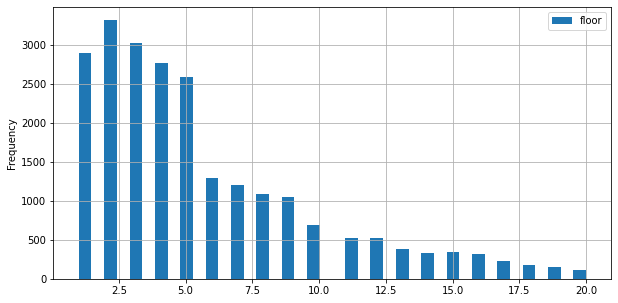

In [35]:
data.plot(y='floor', kind='hist', bins=40, figsize=(10,5), range=(1,20), grid=True)
plt.show()

Basically, the apartments are located between the 1st and 6th floors, most of the apartments are located on the 2nd

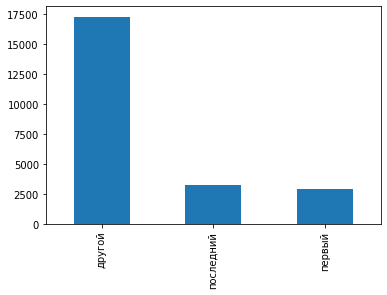

In [36]:
data['floor_definition'].value_counts().plot(kind='bar')
plt.show()

This graph shows that most of the apartments in the database are located between the first and last floor.

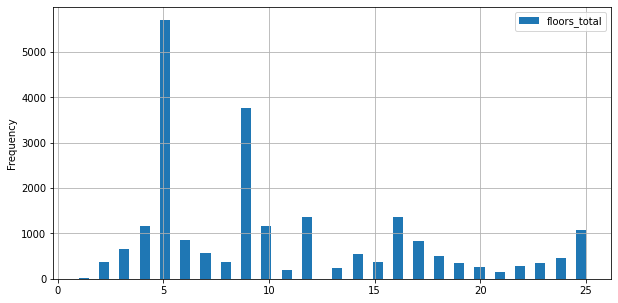

In [37]:
data.plot(y='floors_total', kind='hist', bins=50, figsize=(10,5), range=(1,25), grid=True)
plt.show()

We can see that most of the houses in which the apartments from the ads are located are five-story

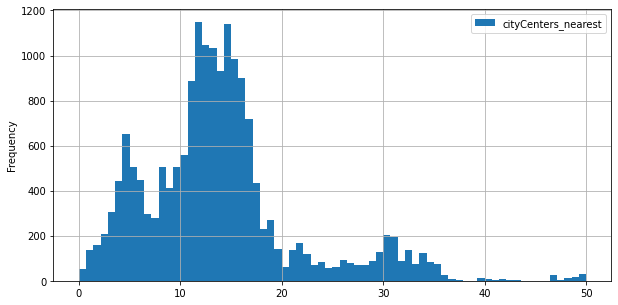

In [38]:
data.plot(y='cityCenters_nearest', kind='hist', bins=70, figsize=(10,5), range=(0,50), grid=True)
plt.show()

The distance of apartments from the center is mainly between 5 and 17 kilometers

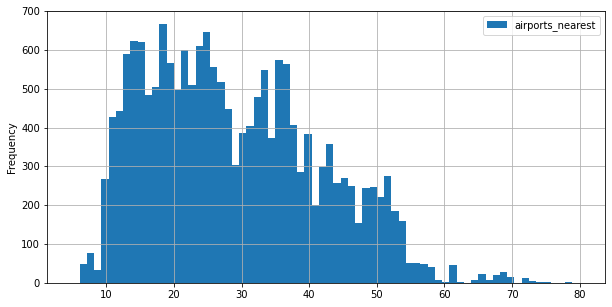

In [39]:
data.plot(y='airports_nearest', kind='hist', bins=70, figsize=(10,5), range=(5,80), grid=True)
plt.show()

Большинство квартир находится на расстояние от 10 до 40 километров от ближайшего аэропорта

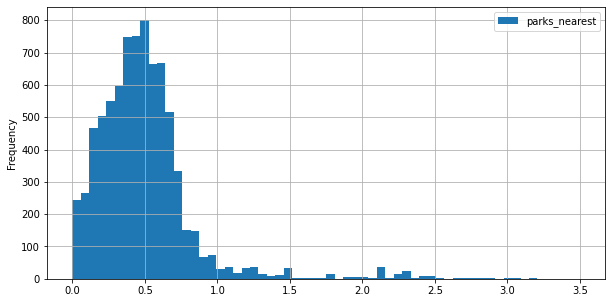

In [40]:
data.plot(y='parks_nearest', kind='hist', bins=60, figsize=(10,5), range=(0,3.5), grid=True)
plt.show()

The distance to the nearest park for most apartments is between 200 and 700 meters

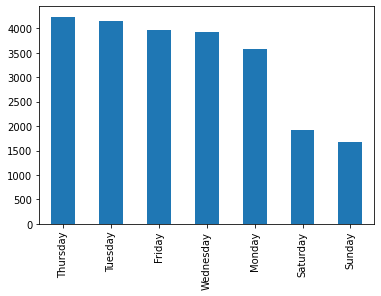

In [41]:
data['day_of_week_exposition'].value_counts().plot(kind='bar')
plt.show()

According to this schedule, you can see that ads mostly appear on weekdays.

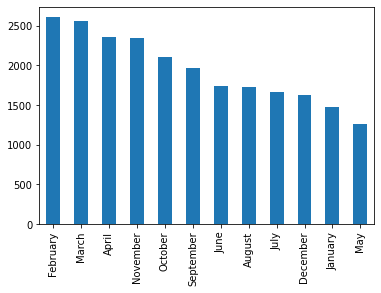

In [42]:
data['month_exposition'].value_counts().plot(kind='bar')
plt.show()

We can conclude that February, March, April and November are the busiest months for finding a new apartment

**4.1** **Complete the task: "Study how quickly apartments sold (days_exposition column). This parameter shows how many days each listing was "hung"**

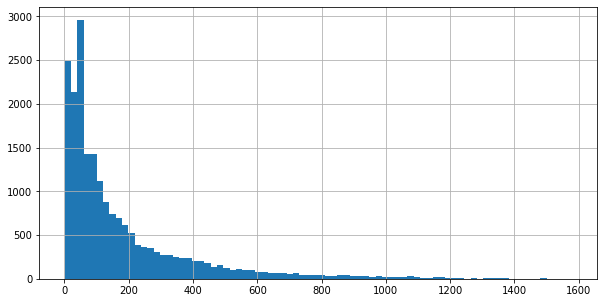

count    20333.000000
mean       180.121625
std        219.236457
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [43]:
data['days_exposition'].hist(bins=80, figsize=(10,5))
plt.show()
data['days_exposition'].describe()

Average sales time 180 days (six months). The median is 95 days. You can see that there are apartments that have been on sale for about 5 years, perhaps they simply forgot to close such ads, values ​​after 500 can be considered unusually long.

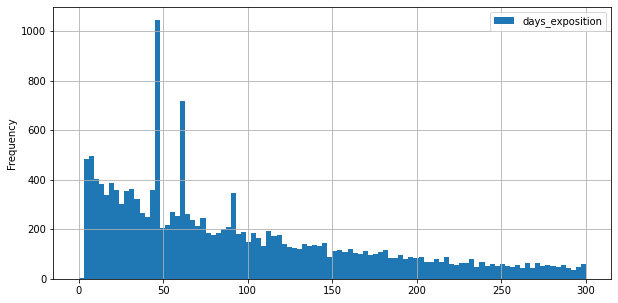

In [44]:
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(10,5), range=(0,300), grid=True)
plt.show()

Most apartments are sold in the first 50 days.

Sales that occurred in the first 95 days (median value) can be considered fast.

**4.2** **Complete the task: "Which factors most influence the total (full) cost of an object? Build graphs that show the dependence of the price on the parameters below. You can use pivot tables to prepare data before visualization."**

0.6791811755998127

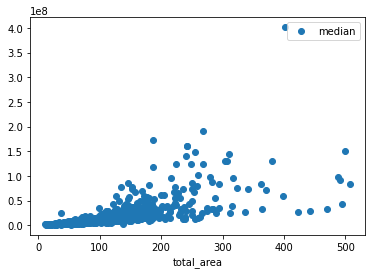

In [45]:
# look at the dependence of the price per square meter on the total area
new_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_total_area.columns = ['mean', 'count', 'median']
new_total_area.plot(y='median', style = 'o')
data['total_area'].corr(data['last_price'])

Based on these data, it can be concluded that the total cost and total area have an average correlation.

0.5799082784970414

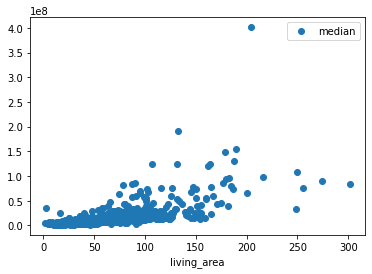

In [46]:
# dependence of the price per square meter on the living area
new_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_living_area.columns = ['mean', 'count', 'median']
new_living_area.plot(y='median', style = 'o')
data['living_area'].corr(data['last_price'])

The correlation is even less than depending on the total area

0.5087445999076416

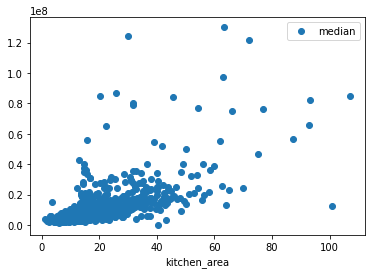

In [47]:
new_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_kitchen_area.columns = ['mean', 'count', 'median']
new_kitchen_area.plot(y='median', style = 'o')
data['kitchen_area'].corr(data['last_price'])

Correlation almost does not differ from the living area

<AxesSubplot:xlabel='rooms'>

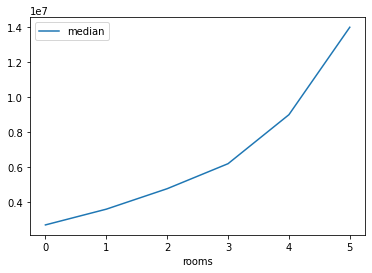

In [48]:
new_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_rooms.columns = ['mean', 'count', 'median']
new_rooms.query('rooms<10').plot(y='median')

We see that there is a dependence of the total price on the number of rooms, after 6 rooms, the other fatcores are already connected to the total price

,mean,count,median
floor_definition,,,
другой,6.489948e+06,17286,4800000.0
первый,4.656718e+06,2893,3900000.0
последний,6.431607e+06,3276,4295000.0


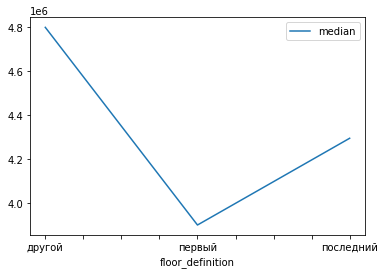

In [49]:
new_floor_definition = data.pivot_table(index = 'floor_definition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_floor_definition.columns = ['mean', 'count', 'median']
new_floor_definition.plot(y='median')
new_floor_definition

We can say that the apartments between the first and the last are in greater demand.

,mean,count,median
day_of_week_exposition,,,
Sunday,6.123395e+06,1681,4500000.0
Saturday,6.279574e+06,1920,4545000.0
Friday,6.263150e+06,3972,4550000.0
Monday,6.110273e+06,3575,4600000.0
Thursday,6.461859e+06,4238,4600000.0
Wednesday,6.230026e+06,3926,4667500.0
Tuesday,6.230019e+06,4143,4700000.0


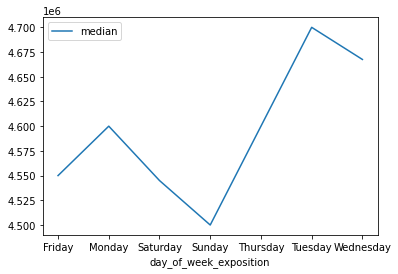

In [50]:
new_day_of_week_exposition = data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_day_of_week_exposition.columns = ['mean', 'count', 'median']
new_day_of_week_exposition.plot(y='median')
new_day_of_week_exposition.sort_values('median')

According to the schedule, we can say that the lowest prices are on weekends. There is a correlation, from Monday to Wednesday prices rise, and closer to the weekend they begin to fall

,mean,count,median
month_exposition,,,
June,6.054367e+06,1742,4400000.0
May,6.318535e+06,1261,4500000.0
August,6.171017e+06,1727,4550000.0
October,5.977354e+06,2109,4550000.0
February,6.290055e+06,2612,4600000.0
January,6.430399e+06,1480,4600000.0
July,6.408644e+06,1669,4600000.0
March,6.106014e+06,2557,4610000.0
December,6.452718e+06,1627,4650000.0


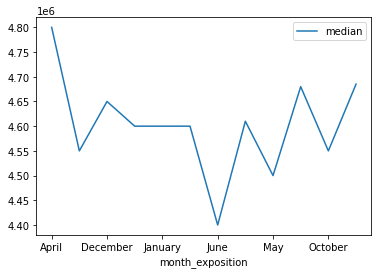

In [51]:
new_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_month_exposition.columns = ['mean', 'count', 'median']
new_month_exposition.plot(y='median')
new_month_exposition.sort_values('median')

Dependence of the price on the month of publication - April turned out to be the busiest: the prices for apartments, whose advertisements for sale were published in April, are higher than in other months. The median of prices for apartments in June ads stands out especially - they are quite low compared to other months

,mean,count,median
year_exposition,,,
2016,6.720809e+06,2748,4500000.0
2017,6.110486e+06,8108,4500000.0
2018,5.823191e+06,8454,4550000.0
2019,6.458499e+06,2849,5000000.0
2015,8.204951e+06,1161,5300000.0
2014,1.154814e+07,135,7580000.0


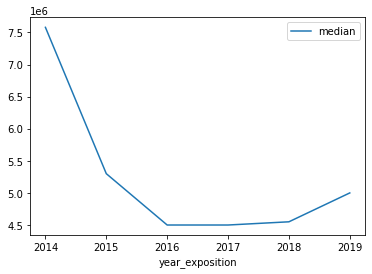

In [52]:
new_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
new_year_exposition.columns = ['mean', 'count', 'median']
new_year_exposition.plot(y='median')
new_year_exposition.sort_values('median')

2014 stands out a lot compared to others. It can be assumed that this is due to the large collapse of the ruble and demand has increased supply. By 2019, the real estate market began to stabilize

**4.3** **Complete the task: "Calculate the average price per square meter in the 10 locations with the most listings. Highlight the locations with the highest and lowest cost per square meter. This data can be found by name in the locality_name column."**

In [53]:
locality_name_10 = data['locality_name'].value_counts().index.tolist()[:10]
avg_price_m2 = [data[data['locality_name'] == city]['price_of_meter'].median().round() for city in locality_name_10]
avg_price_all = [data[data['locality_name'] == city]['last_price'].median() for city in locality_name_10]
graph = {'Город': locality_name_10, 'Средняя цена за кв.м., тыс. руб.': avg_price_m2, 'Средняя цена за квартиру, тыс. руб.': avg_price_all}
dataframe = pd.DataFrame(graph).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,104775.0,5500000.0
4,Пушкин,100000.0,5150000.0
8,деревня Кудрово,91860.0,3790000.0
6,поселок Парголово,91780.0,4100000.0
1,поселок Мурино,85878.0,3400000.0
2,поселок Шушары,76876.0,3950000.0
5,Колпино,74722.0,3600000.0
7,Гатчина,67797.0,3100000.0
3,Всеволожск,65789.0,3450000.0
9,Выборг,58158.0,2897000.0


In St. Petersburg, the highest price per square meter, in Vyborg, the cheapest. Average price in the table

**4.4** **Complete the task: "Earlier you calculated the distance to the center in kilometers. Now select the apartments in St. Petersburg using the locality_name column and calculate the average price per kilometer. Describe how the cost of objects depends on the distance to the city center. **

In [54]:
pd.set_option('chained_assignment', None)
locality_name_spb = data.query('locality_name == "Санкт-Петербург"')
locality_name_spb['cityCenters_nearest'] = locality_name_spb['cityCenters_nearest'].round()
locality_name_spb['cityCenters_nearest']

0        16.0
2        14.0
3         7.0
4         8.0
7        12.0
         ... 
23640    16.0
23641     6.0
23642     4.0
23645     4.0
23648    10.0
Name: cityCenters_nearest, Length: 15535, dtype: float64

,price_of_meter
cityCenters_nearest,
0.0,248023.708805
1.0,177051.609565
2.0,159766.509894
3.0,122196.583283
4.0,130568.456030
5.0,140352.871464
6.0,149351.986956
7.0,156023.085772
8.0,125063.722250


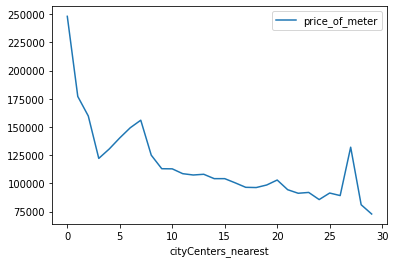

In [55]:
pivot_table_km = locality_name_spb.pivot_table(index = 'cityCenters_nearest', values = 'price_of_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

As expected, the data shows that prices for apartments near the center are the highest, and that prices start to decrease as the distance increases, with a few exceptions. Perhaps the apartments are located in elite areas that are not considered central

### General conclusion

**Research results:**
* Apartments in the center and in St. Petersburg are usually more expensive than apartments outside the center and beyond St. Petersburg, but not always due to the presence of luxury real estate
* The larger the area of ​​the apartment, living area and kitchen area, the higher the price
* The more rooms, the higher the price
* The most expensive apartments are located between the first and last floor, the apartments on the first floor are the cheapest
* At the beginning and end of the year you can observe the highest prices, and in the summer the lowest
* Apartments listed for sale in 2014 are the most expensive, followed by a period of low prices, but closer to 2019, you can see signs of greater stability in the market